In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"ipl_matches_data.csv")
df.head()

,match_id,season_id,balls_per_over,city,match_date,event_name,match_number,gender,match_type,format,...,toss_winner,team1,team2,toss_decision,match_winner,win_by_runs,win_by_wickets,player_of_match,result,stage
0,335982,2008,6,Bangalore,18-04-2008,Indian Premier League,1.0,male,T20,T20,...,Royal Challengers Bangalore,Royal Challengers Bangalore,Kolkata Knight Riders,field,Kolkata Knight Riders,140.0,NaN,46.0,win,NaN
1,1082591,2017,6,Hyderabad,05-04-2017,Indian Premier League,1.0,male,T20,T20,...,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35.0,NaN,15.0,win,NaN
2,1082592,2017,6,Pune,06-04-2017,Indian Premier League,2.0,male,T20,T20,...,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians,field,Rising Pune Supergiant,NaN,7.0,36.0,win,NaN
3,1082593,2017,6,Rajkot,07-04-2017,Indian Premier League,3.0,male,T20,T20,...,Kolkata Knight Riders,Gujarat Lions,Kolkata Knight Riders,field,Kolkata Knight Riders,NaN,10.0,57.0,win,NaN
4,1082594,2017,6,Indore,08-04-2017,Indian Premier League,4.0,male,T20,T20,...,Punjab Kings,Punjab Kings,Rising Pune Supergiant,field,Punjab Kings,NaN,6.0,71.0,win,NaN


In [4]:
# Drop rows where essential data (target or key features) is missing

In [5]:
df.dropna(subset=['match_winner', 'toss_winner', 'toss_decision'], inplace=True)

In [6]:
# Fill missing 'city' with 'Unknown'
df['city'].fillna('Unknown', inplace=True)

In [7]:
# Fill missing win_by_runs and win_by_wickets with 0
df['win_by_runs'].fillna(0, inplace=True)
df['win_by_wickets'].fillna(0, inplace=True)

In [8]:
# Drop irrelevant columns for this simple model
irrelevant_cols = ['match_id', 'season_id', 'balls_per_over', 'match_date', 'event_name', 
                   'match_number', 'gender', 'match_type', 'format', 'overs', 'season', 
                   'team_type', 'venue', 'player_of_match', 'result', 'stage']
df_cleaned = df.drop(columns=irrelevant_cols)

In [9]:
# Save the cleaned data
cleaned_file_path = 'ipl_matches_cleaned.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")
print("\nCleaned Data Info:")
df_cleaned.info()
print("\nCleaned Data Head:")
print(df_cleaned.head())

Cleaned data saved to ipl_matches_cleaned.csv

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1161 entries, 0 to 1167
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            1161 non-null   object 
 1   toss_winner     1161 non-null   object 
 2   team1           1161 non-null   object 
 3   team2           1161 non-null   object 
 4   toss_decision   1161 non-null   object 
 5   match_winner    1161 non-null   object 
 6   win_by_runs     1161 non-null   float64
 7   win_by_wickets  1161 non-null   float64
dtypes: float64(2), object(6)
memory usage: 81.6+ KB

Cleaned Data Head:
        city                  toss_winner                        team1  \
0  Bangalore  Royal Challengers Bangalore  Royal Challengers Bangalore   
1  Hyderabad  Royal Challengers Bangalore          Sunrisers Hyderabad   
2       Pune       Rising Pune Supergiant       Rising Pune Supergiant   
3     Rajkot  

Generated team_wins_barchart.png


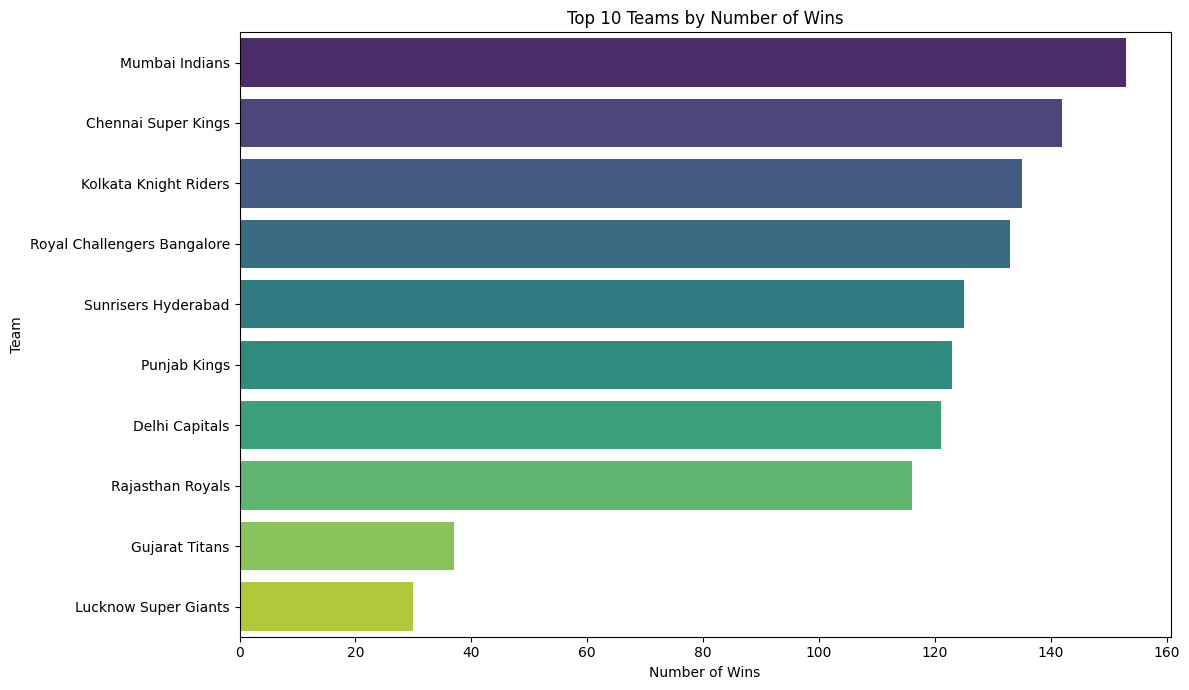

In [10]:
# Plot 1: Top 10 Teams by Wins
plt.figure(figsize=(12, 7))
sns.countplot(y='match_winner', data=df_cleaned, order=df_cleaned['match_winner'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Teams by Number of Wins')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.tight_layout()
plt.savefig('team_wins_barchart.png')
print("Generated team_wins_barchart.png")

Generated city_matches_barchart.png


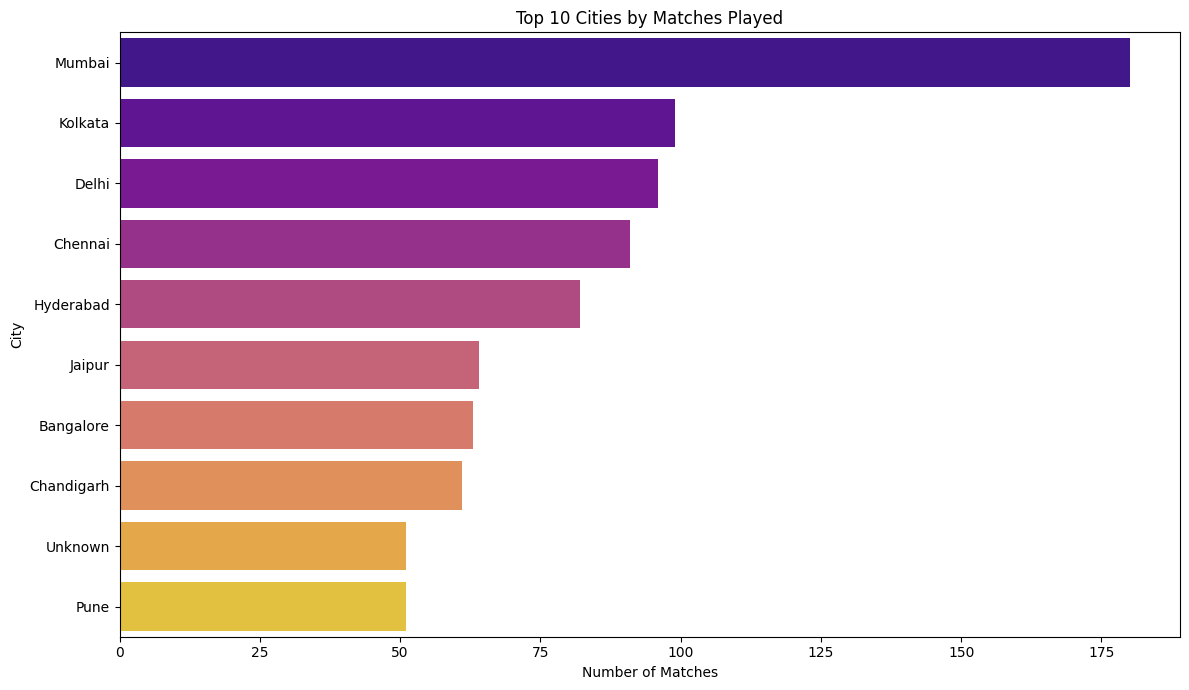

In [11]:
# Plot 2: Top 10 Cities by Matches Played
plt.figure(figsize=(12, 7))
sns.countplot(y='city', data=df_cleaned, order=df_cleaned['city'].value_counts().index[:10], palette='plasma')
plt.title('Top 10 Cities by Matches Played')
plt.xlabel('Number of Matches')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('city_matches_barchart.png')
print("Generated city_matches_barchart.png")

Generated toss_decision_countplot.png


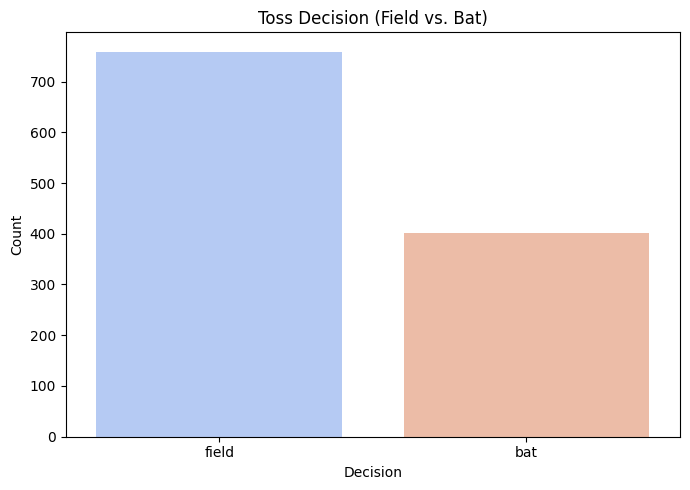

In [12]:
# Plot 3: Toss Decision
plt.figure(figsize=(7, 5))
sns.countplot(x='toss_decision', data=df_cleaned, palette='coolwarm')
plt.title('Toss Decision (Field vs. Bat)')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('toss_decision_countplot.png')
print("Generated toss_decision_countplot.png")

In [13]:
# Define features (X) and target (y)
features = ['team1', 'team2', 'city', 'toss_winner', 'toss_decision']
target = 'match_winner'

X = df_cleaned[features]
y = df_cleaned[target]

In [14]:
# Encode all categorical features and the target
encoders = {}
X_encoded = pd.DataFrame()

In [15]:
for col in features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    encoders[col] = le

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
encoders[target] = le_target

print("\nShape of features (X):", X_encoded.shape)
print("Shape of target (y):", y_encoded.shape)


Shape of features (X): (1161, 5)
Shape of target (y): (1161,)


In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 928 samples
Test set size: 233 samples


In [18]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
print("\nModel training complete.")


Model training complete.


In [20]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le_target.classes_, zero_division=0)

In [21]:
print(f"\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f} (or {accuracy*100:.2f}%)")
print("\nClassification Report:")
print(report)


--- Model Evaluation ---
Accuracy: 0.4721 (or 47.21%)

Classification Report:
                             precision    recall  f1-score   support

        Chennai Super Kings       0.42      0.52      0.46        25
             Delhi Capitals       0.45      0.40      0.43        25
              Gujarat Lions       1.00      0.67      0.80         3
             Gujarat Titans       0.70      0.70      0.70        10
       Kochi Tuskers Kerala       0.00      0.00      0.00         1
      Kolkata Knight Riders       0.60      0.43      0.50        35
       Lucknow Super Giants       0.67      0.50      0.57         4
             Mumbai Indians       0.56      0.55      0.55        42
              Pune Warriors       0.00      0.00      0.00         3
               Punjab Kings       0.37      0.30      0.33        23
           Rajasthan Royals       0.35      0.39      0.37        18
     Rising Pune Supergiant       1.00      0.67      0.80         3
Royal Challengers Banga